Compute the auto-correlation of the CO and CH4 model spectra to determine dominate orders


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.interpolate import interp1d
from scipy.stats import pearsonr

In [100]:
model_dir = 'Models/1x_metallicity_1.0_CO_ratio/'

# load in model
sp        = 'CH4'
mod_file  = model_dir + 'pRT_data_full_{}.dat'.format(sp)
W_mod     = []
T_depth   = []
with open(mod_file, 'r') as data:
    lines = data.readlines()
    data.close()
for line in lines[4:]:
    v = line.split(' ')
    W_mod.append(float(v[0]))
    T_depth.append(float(v[1].split('\n')[0]))
W_mod = np.array(W_mod)#/1e3
T_depth = np.array(T_depth)

In [101]:
## split into orders

## load in some data for wlen reference
datafile = 'Input_data/spirou/data_spirou.pkl'
with open(datafile,'rb') as specfile:
    A = pickle.load(specfile)
orders,WW,Ir,blaze,Ia,T_obs,phase,window,berv,vstar,airmass,SN = A

In [102]:
wmod_ord = []
wmod_ord_mean = []
fmod_ord = []
for iord in range(len(WW)):
    WW_ord = WW[iord]
    l = np.argwhere((WW_ord.min()<W_mod)*(W_mod<WW_ord.max()))[:,0]
    wmod_ord.append(W_mod[l])
    fmod_ord.append(T_depth[l])
    wmod_ord_mean.append(np.mean(W_mod[l]))


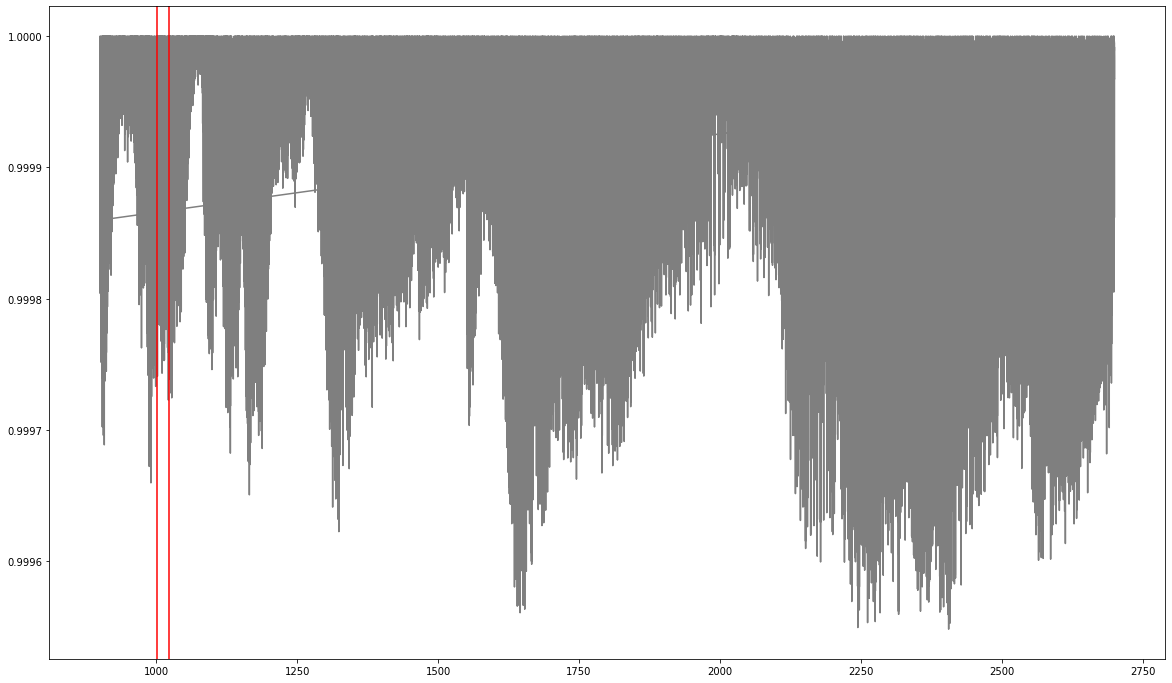

In [110]:
iii = 3
fig = plt.figure(figsize=(20,12))
plt.plot(W_mod,T_depth,'k',alpha=0.5)
plt.axvline(wmod_ord[iii].min(),color='red')
plt.axvline(wmod_ord[iii].max(),color='red')

In [86]:
shifts = np.linspace(-1.5,1.5,50)
ACF = []
for iord in range(len(WW)):
    wl = wmod_ord[iord]
    fl = fmod_ord[iord]
    #func = interp1d(wl,fl,bounds_error=False)
    #ACF = np.zeros((len(shifts)))
    #for i in range(len(shifts)):
    #    fl_shift = func(wl+shifts[i])
    #    l = np.isfinite(fl_shift)
    #    fl_shift = fl_shift[l]
        #ACF[i] = np.sum(np.correlate(fl,fl_shift))
     #   ACF[i] = pearsonr(fl[l],fl_shift)[0]
    ACF.append(np.correlate(fl,fl))
    metric = np.sum(fl**2)
    
    print('Order {}: '.format(iord) + str(metric))
    
    #plt.plot(np.correlate(fl,fl,mode='full'))
    #plt.show()
    
    #print(ACF.shape)
    #plt.plot(shifts,ACF)
    #plt.title('SPIRou Order {}'.format(iord))
    #plt.ylabel("ACF")
    #plt.xlabel('Shift')
    #plt.tight_layout()
    #plt.savefig('Input_data/spirou/ACFs/{}/ACF_{}_order{}.png'.format(sp,sp,iord))
    #plt.show()

Order 0: 19816.2488389298
Order 1: 20480.195336439738
Order 2: 21740.51846450846
Order 3: 22081.516368929737
Order 4: 22364.471981785886
Order 5: 22666.20874513645
Order 6: 23068.646598233463
Order 7: 22446.54747329434
Order 8: 23597.900997735087
Order 9: 22827.976530182215
Order 10: 23575.020372874933
Order 11: 24232.415987645214
Order 12: 25061.652142698807
Order 13: 24877.16374637429
Order 14: 26171.88782381324
Order 15: 26286.794233488312
Order 16: 26854.992340870787
Order 17: 26732.34839998035
Order 18: 27444.86681319188
Order 19: 27034.250839275148
Order 20: 28025.517719066505
Order 21: 28112.928742756474
Order 22: 25349.844462335623
Order 23: 27509.62099102285
Order 24: 28645.54422293426
Order 25: 28341.103190490256
Order 26: 29636.50556043969
Order 27: 29031.007868806675
Order 28: 30628.294867092303
Order 29: 30828.459860672367
Order 30: 31041.17534138004
Order 31: 30785.304144519338
Order 32: 31028.377381549835
Order 33: 31022.33660448149
Order 34: 31019.037697173655
Order 35:

Text(0.5, 0, 'wavelength (nm)')

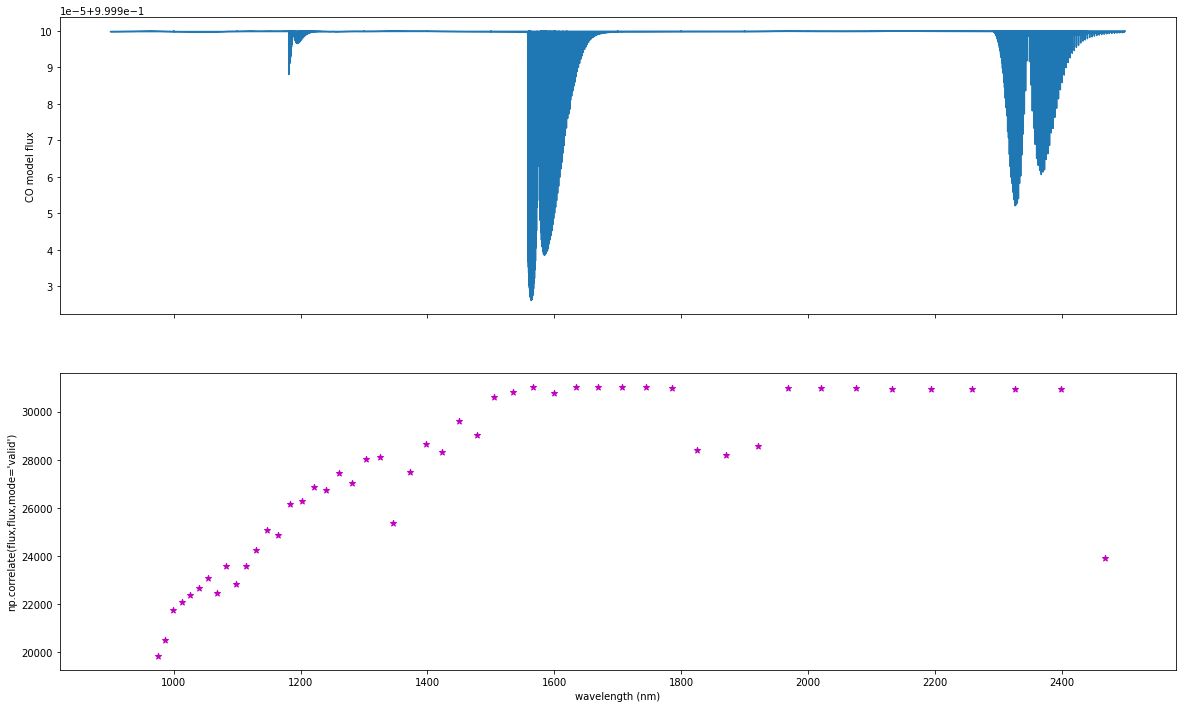

In [99]:
fig,ax = plt.subplots(2,1,sharex=True,figsize=(20,12))
ax[0].plot(W_mod,T_depth)
#plt.axvline(wmod_ord[35][0])
#plt.axvline(wmod_ord[35][-1])
ax[1].scatter(wmod_ord_mean,ACF,s=40,marker='*',color='m')
ax[1].set_ylabel('np.correlate(flux,flux,mode=\'valid\')')
ax[0].set_ylabel('CO model flux')
ax[1].set_xlabel('wavelength (nm)')
